# Análise exploratória de dados

In [2]:
from IPython.display import display, Markdown
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

colors = ["#9467bd", "#057476", "#FF7A00"]
# sns.set_style("whitegrid")
sns.set_theme(style="ticks")
sns.set_palette(sns.color_palette(colors))

## 1. Coleta de dados

In [3]:
df = sns.load_dataset("diamonds")
df.to_csv("../data/raw/data.csv", index = False)

## 2. Dicionário de dados

In [4]:
dicionario = pd.DataFrame([
    {
        "variavel": "carat",
        "descricao": "Peso do diamante em quilates",
        "tipo": "Quantitativa",
        "subtipo": "Contínua"
    },{
        "variavel": "cut",
        "descricao": "Qualidade do corte do diamante",
        "tipo": "Qualitativa",
        "subtipo": "Ordinal"
    },{
        "variavel": "color",
        "descricao": "Cor do diamante",
        "tipo": "Qualitativa",
        "subtipo": "Ordinal"
    },{
        "variavel": "clarity",
        "descricao": "Medida da clareza do diamante",
        "tipo": "Qualitativa",
        "subtipo": "Ordinal"
    },{
        "variavel": "depth",
        "descricao": "Profundidade total do diamante como proporção da largura",
        "tipo": "Quantitativa",
        "subtipo": "Contínua"
    },{
        "variavel": "table",
        "descricao": "Largura do topo do diamante em relação ao ponto mais largo",
        "tipo": "Quantitativa",
        "subtipo": "Contínua"
    },{
        "variavel": "price",
        "descricao": "Preço do diamante em dólares americanos",
        "tipo": "Quantitativa",
        "subtipo": "Contínua"
    },{
        "variavel": "x",
        "descricao": "Comprimento em milímetros",
        "tipo": "Quantitativa",
        "subtipo": "Contínua"
    },{
        "variavel": "y",
        "descricao": "Largura em milímetros",
        "tipo": "Quantitativa",
        "subtipo": "Contínua"
    },{
        "variavel": "z",
        "descricao": "Profundidade em milímetros",
        "tipo": "Quantitativa",
        "subtipo": "Contínua"
    }
])

dicionario

,variavel,descricao,tipo,subtipo
0,carat,Peso do diamante em quilates,Quantitativa,Contínua
1,cut,Qualidade do corte do diamante,Qualitativa,Ordinal
2,color,Cor do diamante,Qualitativa,Ordinal
3,clarity,Medida da clareza do diamante,Qualitativa,Ordinal
4,depth,Profundidade total do diamante como proporção ...,Quantitativa,Contínua
5,table,Largura do topo do diamante em relação ao pont...,Quantitativa,Contínua
6,price,Preço do diamante em dólares americanos,Quantitativa,Contínua
7,x,Comprimento em milímetros,Quantitativa,Contínua
8,y,Largura em milímetros,Quantitativa,Contínua
9,z,Profundidade em milímetros,Quantitativa,Contínua


In [5]:
dicionario.to_csv("../data/external/dicionario.csv", index = False)

## 3. Perguntas de partida e hipóteses

## 3.1 Verificando valores nulos

In [6]:
#verificando e removendo os NA

na_per_column = df.isnull().sum().loc[lambda x: x > 0]
na_per_rows = df.isnull().any(axis=1).sum()

na_per_column

Series([], dtype: int64)

Sendo assim não há valores nulos

## 3.2 Distribuição dos dados

In [7]:
df.describe(include='all')

,carat,cut,color,clarity,depth,table,price,x,y,z
count,53940.000000,53940,53940,53940,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
unique,NaN,5,7,8,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Ideal,G,SI1,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,21551,11292,13065,NaN,NaN,NaN,NaN,NaN,NaN
mean,0.797940,NaN,NaN,NaN,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,NaN,NaN,NaN,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,NaN,NaN,NaN,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,NaN,NaN,NaN,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,NaN,NaN,NaN,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,NaN,NaN,NaN,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000


* Ideal é a qualidade de corte mais frequente entre os diamantes
* A cor classificada como G é o mais frequente entre os diamantes
* Si1 é a claridade mais encontrada nos diamantes
* Preço dos diamantes varia de 326 a 18823 dolares
* O preço médio é 3932.80, com uma váriancia de 3989.43
* quais variáveis tem mais relação com o preço do diamante?
* valores 0 nas variáveis de tamanho x, y, z.

## 3.3 Verificando os valores 0

In [8]:
len(df[(df['x']==0) | (df['y']==0) | (df['z']==0)])

20

como são poucas linhas com valores 0, vou optar por removelas.

In [10]:
df = df[(df[['x','y','z']] != 0).all(axis=1)]

df.describe(include='all')

,carat,cut,color,clarity,depth,table,price,x,y,z
count,53920.000000,53920,53920,53920,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000
unique,NaN,5,7,8,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Ideal,G,SI1,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,21548,11284,13063,NaN,NaN,NaN,NaN,NaN,NaN
mean,0.797698,NaN,NaN,NaN,61.749514,57.456834,3930.993231,5.731627,5.734887,3.540046
std,0.473795,NaN,NaN,NaN,1.432331,2.234064,3987.280446,1.119423,1.140126,0.702530
min,0.200000,NaN,NaN,NaN,43.000000,43.000000,326.000000,3.730000,3.680000,1.070000
25%,0.400000,NaN,NaN,NaN,61.000000,56.000000,949.000000,4.710000,4.720000,2.910000
50%,0.700000,NaN,NaN,NaN,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,NaN,NaN,NaN,62.500000,59.000000,5323.250000,6.540000,6.540000,4.040000


## 3.4 Distribuição das variáveis qualitativas

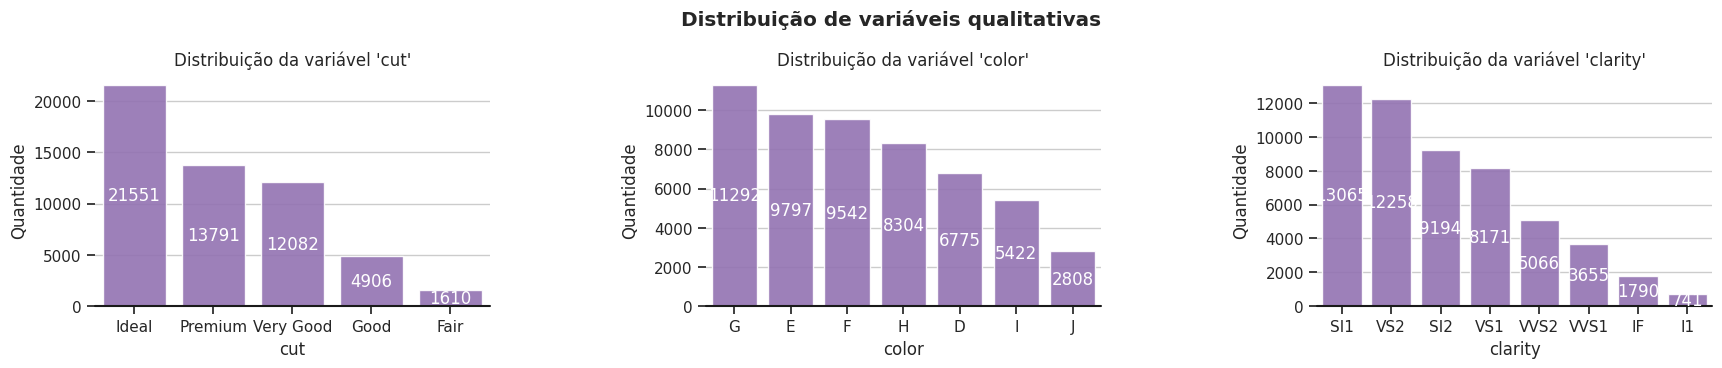

In [8]:
fig, axes = plt.subplots(1, 3, figsize=(18,4))
plt.tight_layout(pad=4, w_pad=10, h_pad=5)
fig.suptitle('Distribuição de variáveis qualitativas', fontweight='bold')
for i, variavel in enumerate(dicionario.query("tipo == 'Qualitativa'").variavel.to_list()):
    order = df[variavel].value_counts().index
    ax = sns.countplot(
        data=df,
        x=variavel,
        ax=axes.flatten()[i],
        color=colors[0],
        alpha=0.9,
        order=order
    )
    ax.bar_label(
        ax.containers[0],
        fmt='%.0f',
        label_type='center',
        color='white'
    )
    ax.set(frame_on=False)
    ax.axhline(0, color="k", clip_on=False)
    ax.set_title(f"Distribuição da variável '{variavel}'")
    ax.set_ylabel('Quantidade')
    ax.grid(axis='y', linestyle='-')
plt.show()

## 3.5 Distribuição das variáveis Quantitativas

IndexError: index 4 is out of bounds for axis 0 with size 4

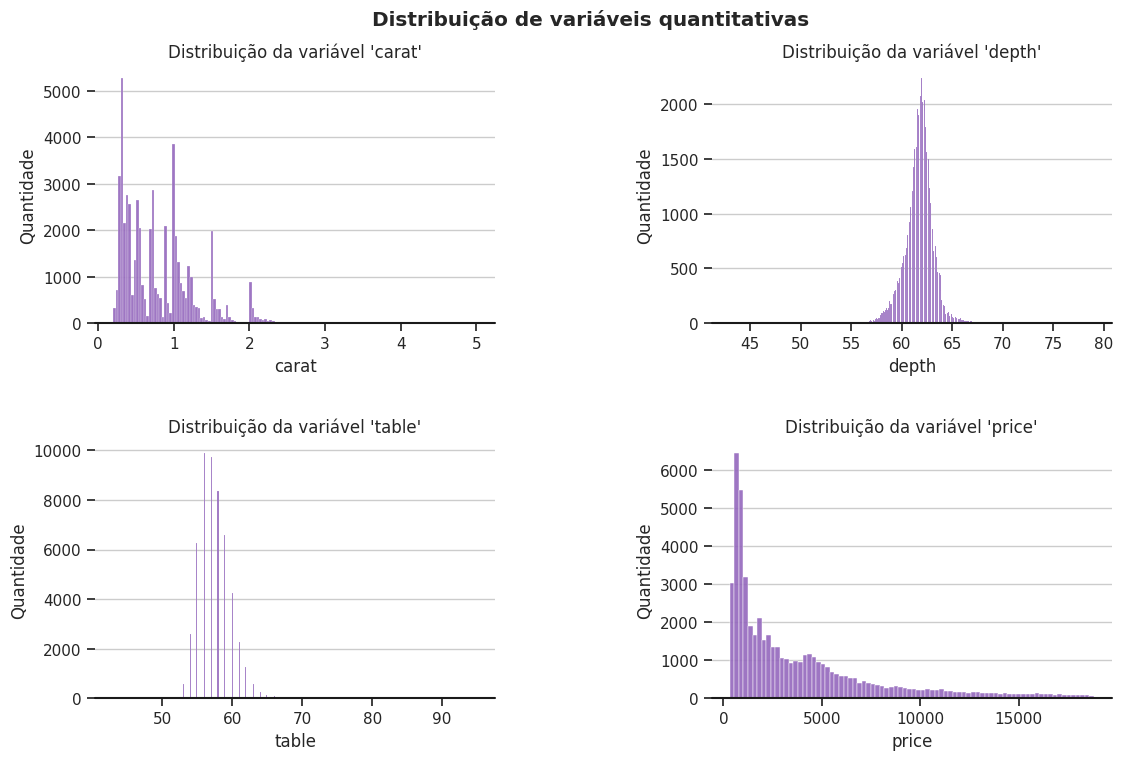

In [17]:
fig, axes = plt.subplots(2, 2, figsize=(12,8))
plt.tight_layout(pad=4, w_pad=10, h_pad=5)
fig.suptitle('Distribuição de variáveis quantitativas', fontweight='bold')
for i, variavel in enumerate(dicionario.query("tipo == 'Quantitativa'").variavel.to_list()):
    ax = sns.histplot(
        data=df,
        x=variavel,
        ax=axes.flatten()[i],
        color=colors[0],
        alpha=0.9,
    )
    ax.set(frame_on=False)
    ax.axhline(0, color="k", clip_on=False)
    ax.set_title(f"Distribuição da variável '{variavel}'")
    plt.xlabel(variavel)
    ax.set_ylabel('Quantidade')
    ax.grid(axis='y', linestyle='-')

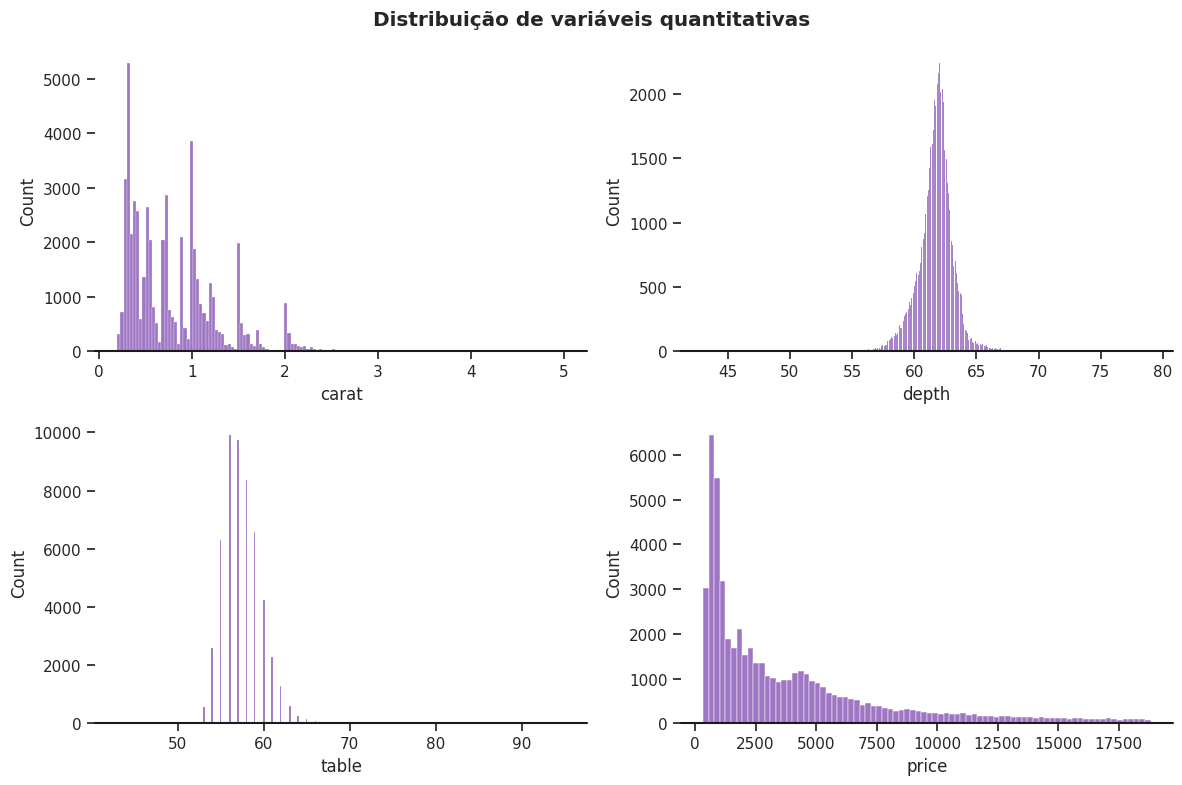

In [16]:
variaveis_quantitativas = dicionario.query("tipo == 'Quantitativa'").variavel.to_list()
num_variaveis = len(variaveis_quantitativas)
num_subplots = len(axes.flatten())

# Ajustando o número de variáveis a serem plotadas
if num_variaveis > num_subplots:
    variaveis_quantitativas = variaveis_quantitativas[:num_subplots]

# Plotando os histogramas
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
fig.suptitle('Distribuição de variáveis quantitativas', fontweight='bold')

for i, variavel in enumerate(variaveis_quantitativas):
    ax = sns.histplot(
        data=df,
        x=variavel,
        ax=axes.flatten()[i],
        color=colors[0],
        alpha=0.9,
    )
    ax.set(frame_on=False)
    ax.axhline(0, color="k", clip_on=False)

plt.tight_layout()
plt.show()

## 3.6 Correlação entre as variáveis

<Axes: >

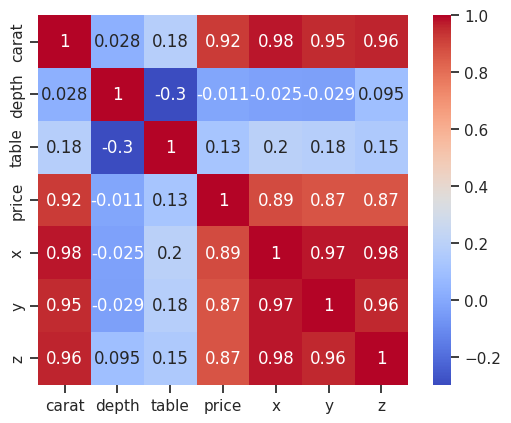

In [13]:
corr = df.corr(numeric_only=True)
sns.heatmap(data=corr, square=True , annot=True, cbar=True, cmap= 'coolwarm')

## 4. Insights

* é possível perceber uma forte relação do preço do diamante com a dimenção(junção das variáveis x, y e z), e com a variável carat que também está relacionada a dimenção do diamante.